In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis
from sklearn.preprocessing import OrdinalEncoder

In [2]:
coll_dist = pd.read_csv("./data/CollegeDistance.csv", index_col=0)

In [3]:
coll_dist.head()

,gender,ethnicity,score,fcollege,mcollege,home,urban,unemp,wage,distance,tuition,education,income,region
rownames,,,,,,,,,,,,,,
1,male,other,39.150002,yes,no,yes,yes,6.2,8.09,0.2,0.88915,12,high,other
2,female,other,48.869999,no,no,yes,yes,6.2,8.09,0.2,0.88915,12,low,other
3,male,other,48.740002,no,no,yes,yes,6.2,8.09,0.2,0.88915,12,low,other
4,male,afam,40.400002,no,no,yes,yes,6.2,8.09,0.2,0.88915,12,low,other
5,female,other,40.480000,no,no,no,yes,5.6,8.09,0.4,0.88915,13,low,other


In [4]:
coll_dist.describe()

,score,unemp,wage,distance,tuition,education
count,4739.000000,4739.000000,4739.000000,4739.000000,4739.000000,4739.000000
mean,50.889029,7.597215,9.500506,1.802870,0.814608,13.807765
std,8.701910,2.763581,1.343067,2.297128,0.339504,1.789107
min,28.950001,1.400000,6.590000,0.000000,0.257510,12.000000
25%,43.924999,5.900000,8.850000,0.400000,0.484990,12.000000
50%,51.189999,7.100000,9.680000,1.000000,0.824480,13.000000
75%,57.769999,8.900000,10.150000,2.500000,1.127020,16.000000
max,72.809998,24.900000,12.960000,20.000000,1.404160,18.000000


In [5]:
coll_dist.describe(include='object')

,gender,ethnicity,fcollege,mcollege,home,urban,income,region
count,4739,4739,4739,4739,4739,4739,4739,4739
unique,2,3,2,2,2,2,2,2
top,female,other,no,no,yes,no,low,other
freq,2600,3050,3753,4088,3887,3635,3374,3796


In [6]:
coll_dist.shape

(4739, 14)

In [7]:
coll_dist.isnull().sum()

gender       0
ethnicity    0
score        0
fcollege     0
mcollege     0
home         0
urban        0
unemp        0
wage         0
distance     0
tuition      0
education    0
income       0
region       0
dtype: int64

In [8]:
for col in coll_dist.columns:
    print(coll_dist[col].value_counts(), end="\n\n")

gender
female    2600
male      2139
Name: count, dtype: int64

ethnicity
other       3050
hispanic     903
afam         786
Name: count, dtype: int64

score
56.020000    9
50.830002    8
51.709999    8
65.790001    7
43.639999    7
            ..
46.480000    1
51.180000    1
48.720001    1
38.040001    1
59.770000    1
Name: count, Length: 2464, dtype: int64

fcollege
no     3753
yes     986
Name: count, dtype: int64

mcollege
no     4088
yes     651
Name: count, dtype: int64

home
yes    3887
no      852
Name: count, dtype: int64

urban
no     3635
yes    1104
Name: count, dtype: int64

unemp
8.0     260
6.6     245
8.2     201
5.9     178
7.2     177
       ... 
12.5      4
14.8      3
3.2       3
14.1      2
12.9      2
Name: count, Length: 116, dtype: int64

wage
8.89     620
9.92     436
9.64     335
10.28    270
9.96     260
7.54     256
11.62    223
10.15    188
12.15    176
10.04    153
7.33     120
9.68     118
8.26     105
10.51    103
10.81    103
8.09     100
7.18      92

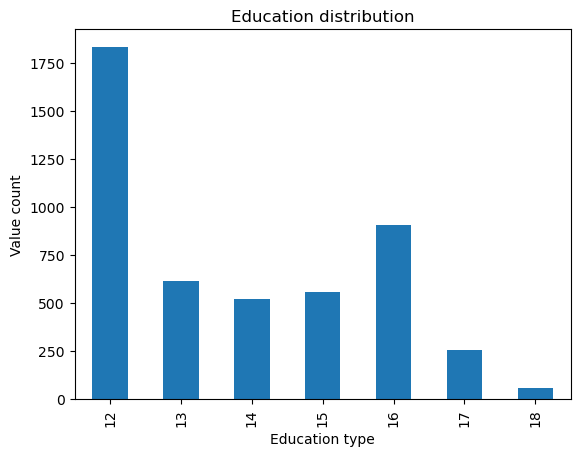

In [9]:
plt.title("Education distribution")
coll_dist["education"].value_counts(sort=False).sort_index().plot(kind="bar")
plt.xlabel("Education type")
plt.ylabel("Value count")
plt.show()

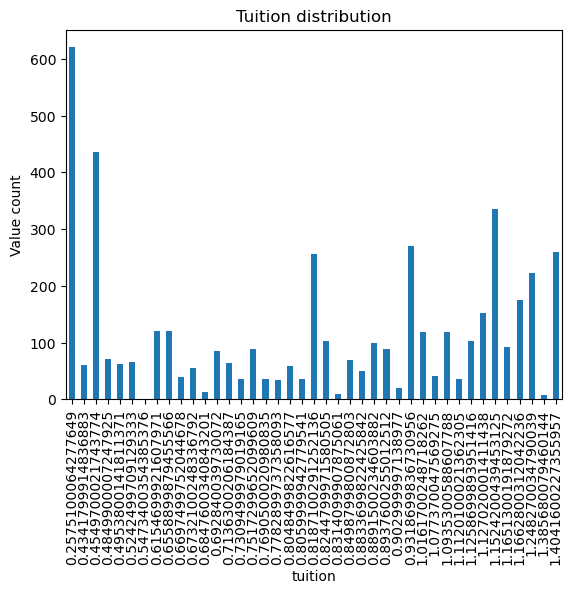

In [10]:
plt.title("Tuition distribution")
coll_dist["tuition"].value_counts(sort=False).sort_index().plot(kind="bar")
plt.ylabel("Value count")
plt.show()

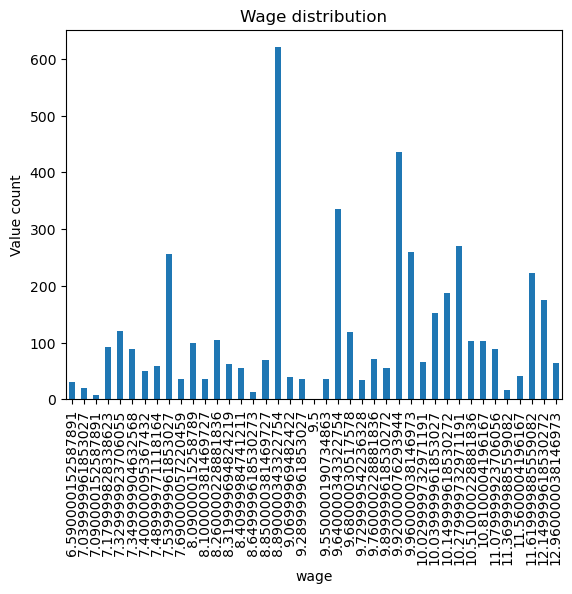

In [11]:
plt.title("Wage distribution")
coll_dist["wage"].value_counts(sort=False).sort_index().plot(kind="bar")
plt.ylabel("Value count")
plt.show()

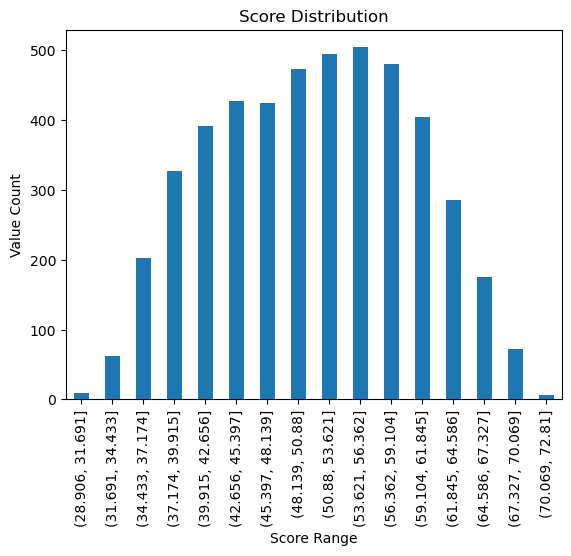

In [12]:
binned_scores = pd.cut(coll_dist["score"], bins=16)
binned_counts = binned_scores.value_counts(sort=False)

plt.title("Score Distribution")
binned_counts.plot(kind="bar")
plt.xlabel("Score Range")
plt.ylabel("Value Count")
plt.show()

In [13]:
for col in coll_dist.select_dtypes(include="number").columns:
    skewness = skew(coll_dist[col].dropna())
    kurt = kurtosis(coll_dist[col].dropna())
    print(f"{col}: Skewness = {skewness:.2f}, Kurtosis = {kurt:.2f}")

score: Skewness = -0.03, Kurtosis = -0.88
unemp: Skewness = 1.56, Kurtosis = 5.41
wage: Skewness = 0.09, Kurtosis = -0.26
distance: Skewness = 3.00, Kurtosis = 13.04
tuition: Skewness = -0.15, Kurtosis = -1.05
education: Skewness = 0.44, Kurtosis = -1.23


In [14]:
numeric_columns = coll_dist.select_dtypes(include="number").columns
coll_dist[numeric_columns]

,score,unemp,wage,distance,tuition,education
rownames,,,,,,
1,39.150002,6.2,8.09,0.2,0.88915,12
2,48.869999,6.2,8.09,0.2,0.88915,12
3,48.740002,6.2,8.09,0.2,0.88915,12
4,40.400002,6.2,8.09,0.2,0.88915,12
5,40.480000,5.6,8.09,0.4,0.88915,13
...,...,...,...,...,...,...
9391,56.529999,6.6,8.89,0.8,0.25751,13
9401,59.770000,6.6,8.89,0.8,0.25751,15
9411,43.169998,6.6,8.89,0.8,0.25751,12


Correlation between 'score' and other columns:
              score     unemp      wage  distance   tuition  education
score      1.000000 -0.025309  0.116627 -0.067979  0.129858   0.465187
unemp     -0.025309  1.000000  0.266771  0.293036  0.184027  -0.014746
wage       0.116627  0.266771  1.000000 -0.000390  0.317727   0.023858
distance  -0.067979  0.293036 -0.000390  1.000000 -0.100981  -0.093183
tuition    0.129858  0.184027  0.317727 -0.100981  1.000000   0.039534
education  0.465187 -0.014746  0.023858 -0.093183  0.039534   1.000000


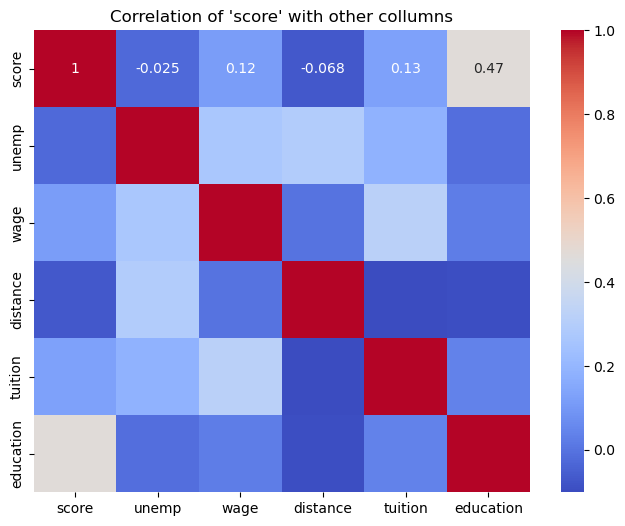

In [17]:
numeric_columns = coll_dist.select_dtypes(include="number").columns

correlations = coll_dist[numeric_columns].corr()
print("Correlation between 'score' and other columns:")
print(correlations)

plt.figure(figsize=(8, 6))
sns.heatmap(correlations, cmap="coolwarm", annot=True)
plt.title("Correlation of 'score' with other collumns")
plt.show()

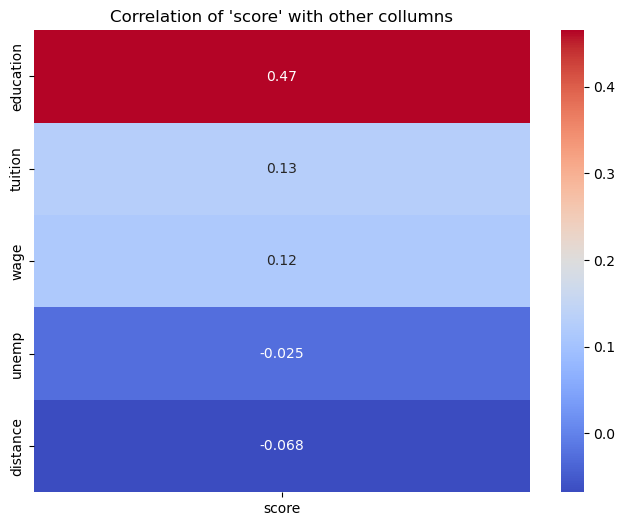

In [18]:
numeric_columns = coll_dist.select_dtypes(include="number").columns

correlations = coll_dist[numeric_columns].corr()["score"]
plt.figure(figsize=(8, 6))
sns.heatmap(correlations.drop("score").sort_values(ascending=False).to_frame(), cmap="coolwarm", annot=True)
plt.title("Correlation of 'score' with other collumns")
plt.show()

In [21]:
coll_dist.select_dtypes(include=["object", "bool", "category"])

,gender,ethnicity,fcollege,mcollege,home,urban,income,region
rownames,,,,,,,,
1,male,other,yes,no,yes,yes,high,other
2,female,other,no,no,yes,yes,low,other
3,male,other,no,no,yes,yes,low,other
4,male,afam,no,no,yes,yes,low,other
5,female,other,no,no,no,yes,low,other
...,...,...,...,...,...,...,...,...
9391,male,afam,no,no,yes,no,high,west
9401,male,afam,no,no,yes,no,high,west
9411,male,other,no,no,yes,no,high,west


In [26]:
categorical_columns = coll_dist.select_dtypes(include=["object", "bool", "category"]).columns
categorical_columns

Index(['gender', 'ethnicity', 'fcollege', 'mcollege', 'home', 'urban',
       'income', 'region'],
      dtype='object')

In [27]:
encoder = OrdinalEncoder()

coll_dist[categorical_columns] = encoder.fit_transform(coll_dist[categorical_columns])

In [28]:
coll_dist.head()

,gender,ethnicity,score,fcollege,mcollege,home,urban,unemp,wage,distance,tuition,education,income,region
rownames,,,,,,,,,,,,,,
1,1.0,2.0,39.150002,1.0,0.0,1.0,1.0,6.2,8.09,0.2,0.88915,12,0.0,0.0
2,0.0,2.0,48.869999,0.0,0.0,1.0,1.0,6.2,8.09,0.2,0.88915,12,1.0,0.0
3,1.0,2.0,48.740002,0.0,0.0,1.0,1.0,6.2,8.09,0.2,0.88915,12,1.0,0.0
4,1.0,0.0,40.400002,0.0,0.0,1.0,1.0,6.2,8.09,0.2,0.88915,12,1.0,0.0
5,0.0,2.0,40.480000,0.0,0.0,0.0,1.0,5.6,8.09,0.4,0.88915,13,1.0,0.0


In [31]:
coll_dist[categorical_columns] = coll_dist[categorical_columns].astype(int)

In [32]:
coll_dist.head()

,gender,ethnicity,score,fcollege,mcollege,home,urban,unemp,wage,distance,tuition,education,income,region
rownames,,,,,,,,,,,,,,
1,1,2,39.150002,1,0,1,1,6.2,8.09,0.2,0.88915,12,0,0
2,0,2,48.869999,0,0,1,1,6.2,8.09,0.2,0.88915,12,1,0
3,1,2,48.740002,0,0,1,1,6.2,8.09,0.2,0.88915,12,1,0
4,1,0,40.400002,0,0,1,1,6.2,8.09,0.2,0.88915,12,1,0
5,0,2,40.480000,0,0,0,1,5.6,8.09,0.4,0.88915,13,1,0


In [33]:
coll_dist.select_dtypes(include=["int"])

,gender,ethnicity,fcollege,mcollege,home,urban,education,income,region
rownames,,,,,,,,,
1,1,2,1,0,1,1,12,0,0
2,0,2,0,0,1,1,12,1,0
3,1,2,0,0,1,1,12,1,0
4,1,0,0,0,1,1,12,1,0
5,0,2,0,0,0,1,13,1,0
...,...,...,...,...,...,...,...,...,...
9391,1,0,0,0,1,0,13,0,1
9401,1,0,0,0,1,0,15,0,1
9411,1,2,0,0,1,0,12,0,1


In [34]:
coll_dist.select_dtypes(include=["float"])

,score,unemp,wage,distance,tuition
rownames,,,,,
1,39.150002,6.2,8.09,0.2,0.88915
2,48.869999,6.2,8.09,0.2,0.88915
3,48.740002,6.2,8.09,0.2,0.88915
4,40.400002,6.2,8.09,0.2,0.88915
5,40.480000,5.6,8.09,0.4,0.88915
...,...,...,...,...,...
9391,56.529999,6.6,8.89,0.8,0.25751
9401,59.770000,6.6,8.89,0.8,0.25751
9411,43.169998,6.6,8.89,0.8,0.25751


In [40]:
encoding_dict = {
    column: dict(zip(encoder.categories_[i], range(len(encoder.categories_[i]))))
    for i, column in enumerate(categorical_columns)
}

encoding_dict

{'gender': {'female': 0, 'male': 1},
 'ethnicity': {'afam': 0, 'hispanic': 1, 'other': 2},
 'fcollege': {'no': 0, 'yes': 1},
 'mcollege': {'no': 0, 'yes': 1},
 'home': {'no': 0, 'yes': 1},
 'urban': {'no': 0, 'yes': 1},
 'income': {'high': 0, 'low': 1},
 'region': {'other': 0, 'west': 1}}

In [43]:
coll_dist.to_csv("data/CollegeDistanceCleaned.csv", index=False)

In [42]:
import joblib

joblib.dump(encoder, "models/ordinal_encoder.pkl")

['ordinal_encoder.pkl']